<a href="https://colab.research.google.com/github/kush-com/Thermistor-Sensor-data-analysis/blob/main/Thermistor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd  # Import pandas library

df = pd.read_csv("Dataset - 9.csv")  # Ensure the filename matches the uploaded file
print(df.head())  # Display first few rows


   PIR_SENSOR      TIME    TIME_2  GPS_X  GPS_Y  THERMISTOR( F )  AC STATUS  \
0          54   6.00.00   6.00.00    221    245               77          1   
1          87  17.00.00  17.00.00    654    453               82          1   
2          89  21.00.00  21.00.00    666    234               58          1   
3          54   4.00.00   4.00.00    583    128               77          1   
4          55  14.00.00  14.00.00    490    542               75          0   

   SMOKE_DETECTOR  FIRE_DETECTOR  CONTACT SENSOR_DOOR  CONTACT SENSOR_WINDOW  \
0               0              0                    1                      0   
1               0              0                    0                      0   
2               1              1                    0                      1   
3               0              0                    0                      0   
4               1              1                    0                      0   

   C1  C2  C3  C4  WEIGHT_OF_PACKAGE  
0  98

In [ ]:
# Display the data types of each column
df.dtypes


,0
PIR_SENSOR,int64
TIME,datetime64[ns]
TIME_2,datetime64[ns]
GPS_X,int64
GPS_Y,int64
THERMISTOR( F ),int64
AC STATUS,int64
SMOKE_DETECTOR,int64
FIRE_DETECTOR,int64
CONTACT SENSOR_DOOR,int64


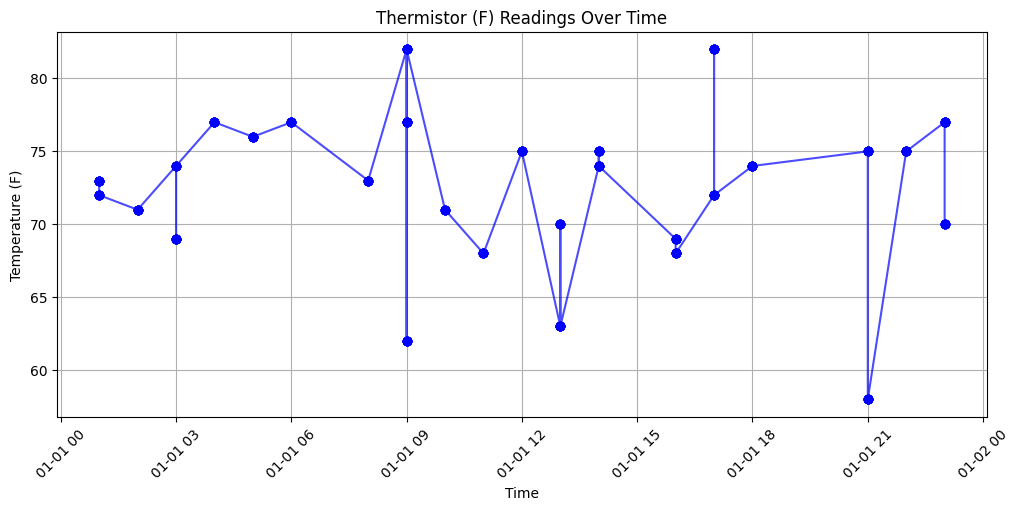

In [ ]:
import matplotlib.pyplot as plt

# Convert TIME to a standardized datetime format (assuming HH.MM.SS format)
df["TIME"] = pd.to_datetime(df["TIME"], format="%H.%M.%S", errors='coerce')

# Sort by time for proper trend visualization
df_sorted = df.sort_values(by="TIME")

# Plot THERMISTOR (F) readings over time
plt.figure(figsize=(12, 5))
plt.plot(df_sorted["TIME"], df_sorted["THERMISTOR( F )"], marker="o", linestyle="-", color="b", alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Temperature (F)")
plt.title("Thermistor (F) Readings Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
# Identify the top time periods with the highest PIR_SENSOR values
top_motion_times = df_sorted.nlargest(5, "PIR_SENSOR")[["TIME", "PIR_SENSOR"]]
top_motion_times


,TIME,PIR_SENSOR
185,1900-01-01 13:00:00,100
18,1900-01-01 13:00:00,100
223,1900-01-01 13:00:00,100
256,1900-01-01 13:00:00,100
46,1900-01-01 13:00:00,100


In [ ]:

# Convert TIME and TIME_2 using correct time format
df["TIME"] = pd.to_datetime(df["TIME"], format="%H.%M.%S", errors='coerce')
df["TIME_2"] = pd.to_datetime(df["TIME_2"], format="%H.%M.%S", errors='coerce')

# Filter data for PIR_SENSOR values between TIME and TIME_2 of row 7
mask = (df["TIME"] >= df.iloc[6]["TIME"]) & (df["TIME"] <= df.iloc[6]["TIME_2"])
pir_values_during_period = df.loc[mask, ["TIME", "PIR_SENSOR"]]

pir_values_during_period


,TIME,PIR_SENSOR
5,1900-01-01 16:00:00,23
6,1900-01-01 16:00:00,29
34,1900-01-01 16:00:00,23
35,1900-01-01 16:00:00,29
62,1900-01-01 16:00:00,23
63,1900-01-01 16:00:00,29
91,1900-01-01 16:00:00,23
92,1900-01-01 16:00:00,29
115,1900-01-01 16:00:00,23
116,1900-01-01 16:00:00,29


<ipython-input-8-7f01dd35d2bd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_sorted["AC STATUS"], y=df_sorted["THERMISTOR( F )"], palette="coolwarm")


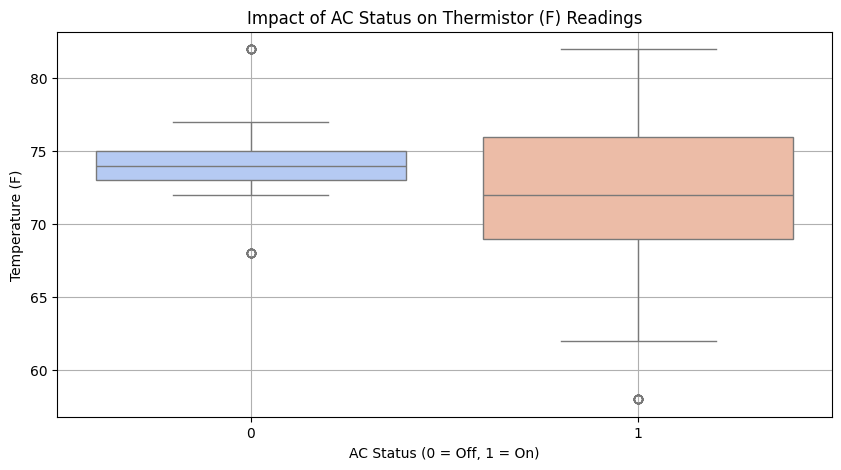

In [ ]:
import seaborn as sns

# Scatter plot to visualize correlation between AC STATUS and temperature
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_sorted["AC STATUS"], y=df_sorted["THERMISTOR( F )"], palette="coolwarm")
plt.xlabel("AC Status (0 = Off, 1 = On)")
plt.ylabel("Temperature (F)")
plt.title("Impact of AC Status on Thermistor (F) Readings")
plt.grid()
plt.show()


In [ ]:
# Check how often Smoke Detector and Fire Detector activate together
simultaneous_activations = df[(df["SMOKE_DETECTOR"] == 1) & (df["FIRE_DETECTOR"] == 1)].shape[0]
total_fire_activations = df[df["FIRE_DETECTOR"] == 1].shape[0]
total_smoke_activations = df[df["SMOKE_DETECTOR"] == 1].shape[0]

# Calculate the percentage of simultaneous activations
simultaneous_percentage = (simultaneous_activations / min(total_fire_activations, total_smoke_activations)) * 100

simultaneous_activations, total_fire_activations, total_smoke_activations, simultaneous_percentage


(52, 64, 76, 81.25)

In [ ]:
# Group by GPS coordinates and find the average PIR_SENSOR value at each location
motion_by_location = df.groupby(["GPS_X", "GPS_Y"])["PIR_SENSOR"].mean().reset_index()

# Find the top 5 locations with the highest average motion detection
top_motion_locations = motion_by_location.nlargest(5, "PIR_SENSOR")
top_motion_locations


,GPS_X,GPS_Y,PIR_SENSOR
8,465,452,100.0
12,562,521,89.0
18,666,234,89.0
17,654,453,87.0
27,800,280,84.0


In [ ]:
# Compute the average PIR_SENSOR value when door/window is open vs closed
door_motion_avg = df.groupby("CONTACT SENSOR_DOOR")["PIR_SENSOR"].mean()
window_motion_avg = df.groupby("CONTACT SENSOR_WINDOW")["PIR_SENSOR"].mean()

door_motion_avg, window_motion_avg


(CONTACT SENSOR_DOOR
 0    55.266667
 1    42.092308
 Name: PIR_SENSOR, dtype: float64,
 CONTACT SENSOR_WINDOW
 0    46.826415
 1    80.363636
 Name: PIR_SENSOR, dtype: float64)

In [ ]:
# Calculate mean and standard deviation of THERMISTOR (F)
thermistor_mean = df["THERMISTOR( F )"].mean()
thermistor_std = df["THERMISTOR( F )"].std()

thermistor_mean, thermistor_std


(72.446875, 5.262124937304263)

    **SOURCE** OF INFORMATION FOR BELOW FILTER:-
https://www.youtube.com/watch?v=rttn46_Y3c8

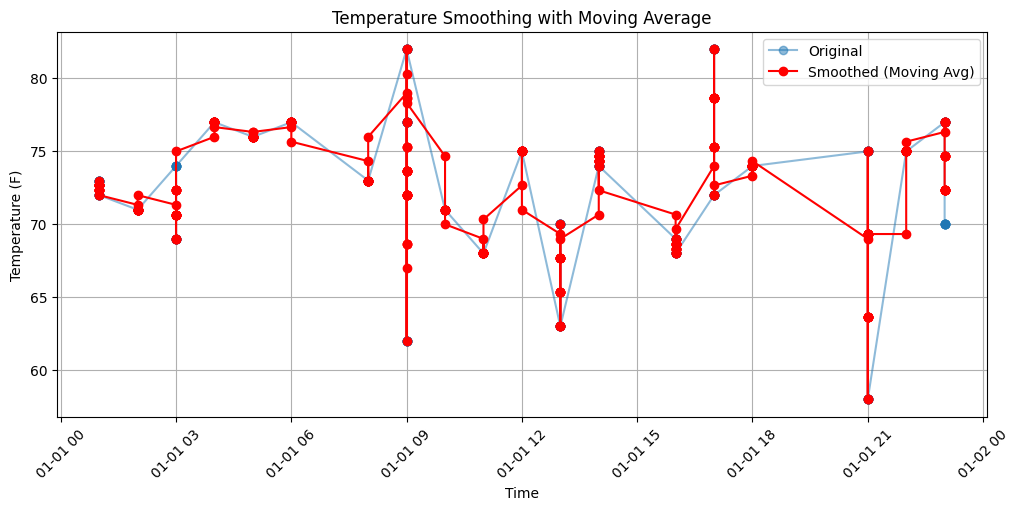

In [ ]:
# Apply a moving average filter (window size = 3) correctly
df_sorted["THERMISTOR_SMOOTHED"] = df_sorted["THERMISTOR( F )"].rolling(window=3, center=True).mean()

# Plot original vs smoothed temperature data
plt.figure(figsize=(12, 5))
plt.plot(df_sorted["TIME"], df_sorted["THERMISTOR( F )"], label="Original", alpha=0.5, marker="o", linestyle="-")
plt.plot(df_sorted["TIME"], df_sorted["THERMISTOR_SMOOTHED"], label="Smoothed (Moving Avg)", color="red", marker="o", linestyle="-")
plt.xlabel("Time")
plt.ylabel("Temperature (F)")
plt.title("Temperature Smoothing with Moving Average")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()


    NEED FOR IMPLEMENTING BELOW GIVE MEDIAN FILTER

                        Key Differences

Median Filter:- It Removes sudden spikes, Excellent in spike handling, best for motion sensors.

Moving Average Filter:-	Smooths gradual variations, Not good for handelling spikes, Excellent	for Temperature, humidity, pressure sensors

                   TIME  PIR_SENSOR  PIR_SENSOR_FILTERED
54  1900-01-01 01:00:00          14                   14
26  1900-01-01 01:00:00          14                   14
253 1900-01-01 01:00:00          34                   14
164 1900-01-01 01:00:00          14                   14
83  1900-01-01 01:00:00          14                   14
193 1900-01-01 01:00:00          14                   14
153 1900-01-01 01:00:00          34                   34
43  1900-01-01 01:00:00          34                   34
249 1900-01-01 01:00:00          34                   34
264 1900-01-01 01:00:00          14                   34


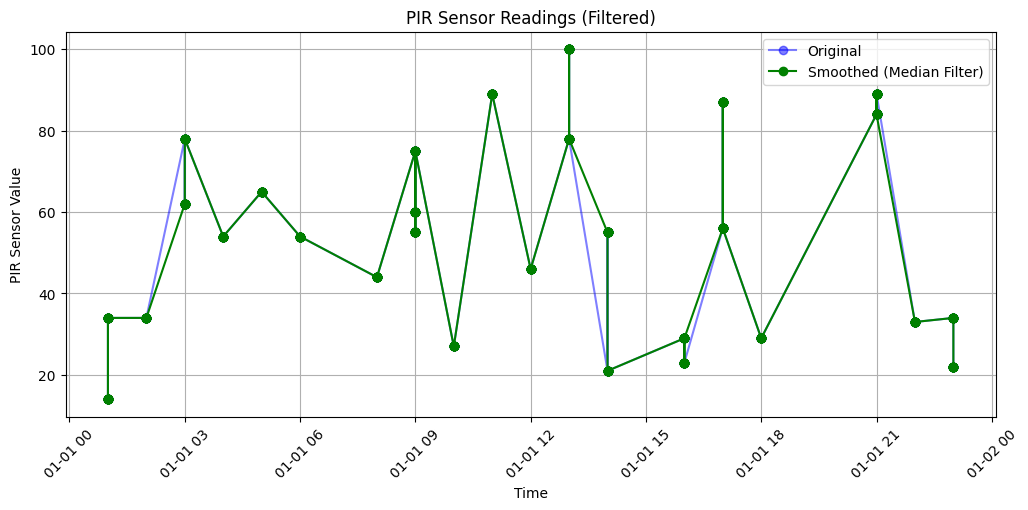

In [ ]:
import pandas as pd
from scipy.signal import medfilt
import matplotlib.pyplot as plt

# Load dataset (Ensure it's already loaded in `df`)
df["TIME"] = pd.to_datetime(df["TIME"], format="%H.%M.%S", errors="coerce")  # Convert first

# Remove NaN values in TIME before sorting
df = df.dropna(subset=["TIME"]).sort_values(by="TIME")

# Apply Median Filter (Kernel size = 3, ensuring valid window size)
df["PIR_SENSOR_FILTERED"] = medfilt(df["PIR_SENSOR"], kernel_size=3)

# Display first few rows for verification
print(df[["TIME", "PIR_SENSOR", "PIR_SENSOR_FILTERED"]].head(10))

# Plot original vs filtered PIR sensor data
plt.figure(figsize=(12, 5))
plt.plot(df["TIME"], df["PIR_SENSOR"], label="Original", alpha=0.5, marker="o", linestyle="-", color="blue")
plt.plot(df["TIME"], df["PIR_SENSOR_FILTERED"], label="Smoothed (Median Filter)", color="green", marker="o", linestyle="-")
plt.xlabel("Time")
plt.ylabel("PIR Sensor Value")
plt.title("PIR Sensor Readings (Filtered)")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()


    Advantage of Butterworth filter

A low-pass Butterworth filter effectively removes high-frequency noise from sensor data (e.g., PIR motion & temperature readings) while preserving smooth transitions

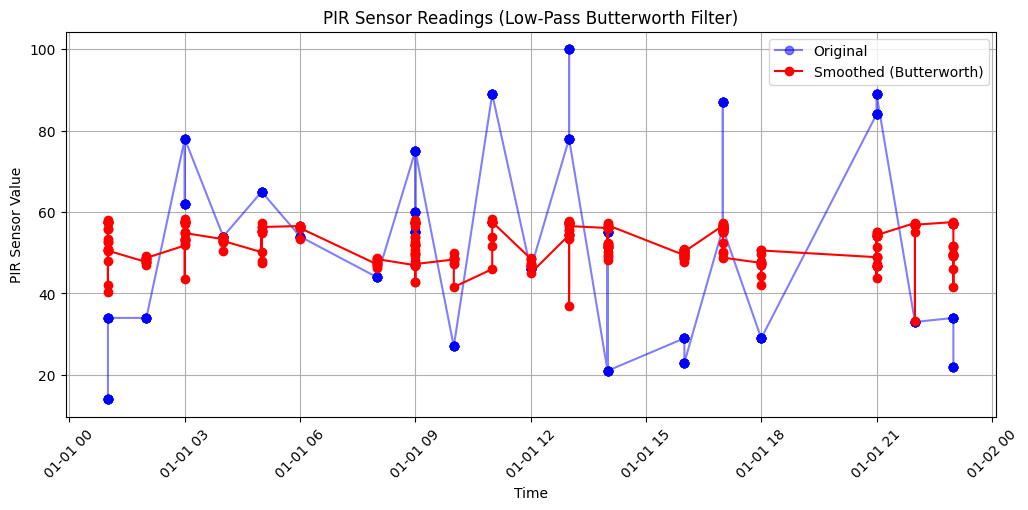

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Load the dataset
file_path = "Dataset - 9.csv"
df = pd.read_csv(file_path)

# Convert TIME to datetime
df["TIME"] = pd.to_datetime(df["TIME"], format="%H.%M.%S", errors="coerce")

# Design a Butterworth Low-Pass Filter
def butter_lowpass_filter(data, cutoff=0.1, fs=1.0, order=3):
    b, a = butter(order, cutoff, btype="low", analog=False, fs=fs)
    return filtfilt(b, a, data)

# Apply the filter to PIR_SENSOR
df["PIR_SENSOR_FILTERED"] = butter_lowpass_filter(df["PIR_SENSOR"], cutoff=0.05, fs=1.0, order=3)

# Sort Data by Time for Plotting
df_sorted = df.sort_values(by="TIME")

# Plot Original vs Filtered PIR Sensor Data
plt.figure(figsize=(12, 5))
plt.plot(df_sorted["TIME"], df_sorted["PIR_SENSOR"], label="Original", alpha=0.5, marker="o", linestyle="-", color="blue")
plt.plot(df_sorted["TIME"], df_sorted["PIR_SENSOR_FILTERED"], label="Smoothed (Butterworth)", color="red", marker="o", linestyle="-")
plt.xlabel("Time")
plt.ylabel("PIR Sensor Value")
plt.title("PIR Sensor Readings (Low-Pass Butterworth Filter)")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [ ]:
# Define fire alarm activation based on logic
df["FIRE_ALARM"] = ((df["SMOKE_DETECTOR"] == 1) & (df["FIRE_DETECTOR"] == 1)) | \
                   ((df["SMOKE_DETECTOR"] == 1) & (df["THERMISTOR( F )"] > thermistor_mean + thermistor_std)) | \
                   (df["FIRE_DETECTOR"] == 1)

# Count how many times the alarm is triggered
fire_alarm_count = df["FIRE_ALARM"].sum()

# Display sample rows where the fire alarm is triggered
fire_alarm_count, df[df["FIRE_ALARM"] == True].head()


(64,
     PIR_SENSOR                TIME    TIME_2  GPS_X  GPS_Y  THERMISTOR( F )  \
 2           89 1900-01-01 21:00:00  21.00.00    666    234               58   
 4           55 1900-01-01 14:00:00  14.00.00    490    542               75   
 13          27 1900-01-01 10:00:00  10.00.00    544    180               71   
 17          78 1900-01-01 03:00:00   3.00.00    452    456               74   
 20          21 1900-01-01 14:00:00  14.00.00    714      0               74   
 
     AC STATUS  SMOKE_DETECTOR  FIRE_DETECTOR  CONTACT SENSOR_DOOR  \
 2           1               1              1                    0   
 4           0               1              1                    0   
 13          1               1              1                    0   
 17          0               1              1                    0   
 20          0               1              1                    1   
 
     CONTACT SENSOR_WINDOW  C1   C2  C3  C4  WEIGHT_OF_PACKAGE  \
 2                       

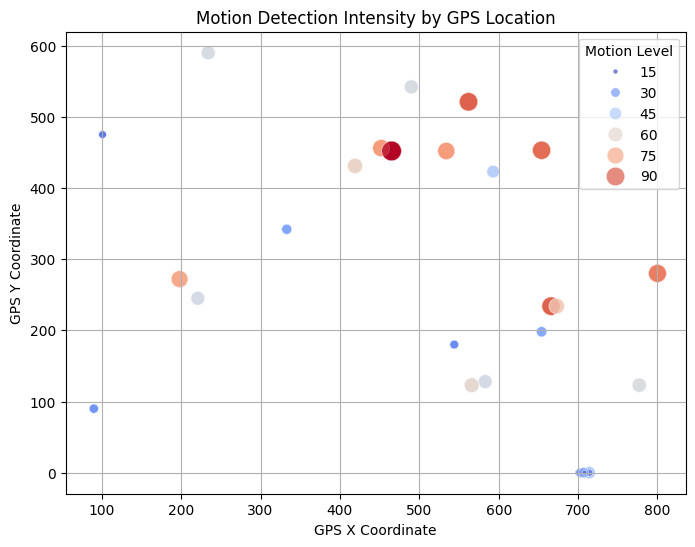

In [ ]:
import seaborn as sns

# Scatter plot for motion detection locations
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="GPS_X", y="GPS_Y", size="PIR_SENSOR", hue="PIR_SENSOR", palette="coolwarm", sizes=(10, 200), alpha=0.7)
plt.xlabel("GPS X Coordinate")
plt.ylabel("GPS Y Coordinate")
plt.title("Motion Detection Intensity by GPS Location")
plt.legend(title="Motion Level", bbox_to_anchor=(1,1))
plt.grid()
plt.show()


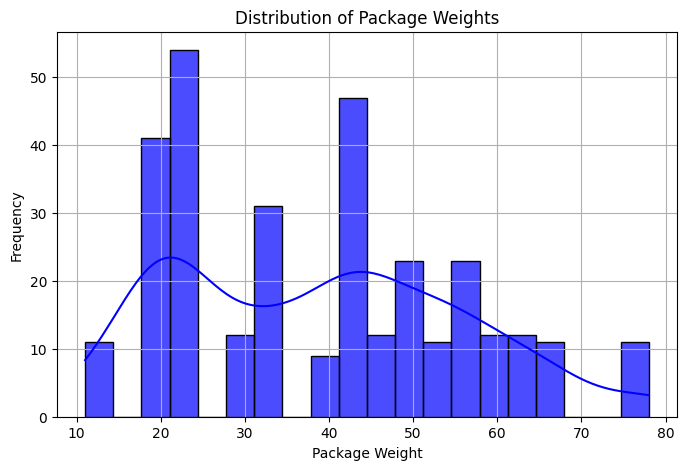

In [ ]:
# Plot distribution of package weights
plt.figure(figsize=(8,5))
sns.histplot(df["WEIGHT_OF_PACKAGE"], bins=20, kde=True, color="blue", alpha=0.7)
plt.xlabel("Package Weight")
plt.ylabel("Frequency")
plt.title("Distribution of Package Weights")
plt.grid()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Selecting relevant features for prediction
features = ["AC STATUS", "PIR_SENSOR", "SMOKE_DETECTOR", "FIRE_DETECTOR", "WEIGHT_OF_PACKAGE"]
X = df[features]
y = df["THERMISTOR( F )"]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2


(3.4916938731254072, 0.20288173828066436)

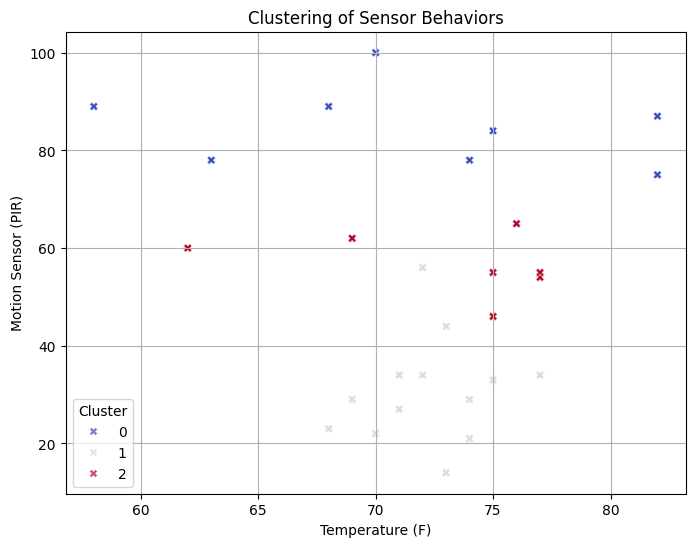

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Selecting features for clustering
cluster_features = ["THERMISTOR( F )", "PIR_SENSOR", "WEIGHT_OF_PACKAGE"]
X_cluster = df[cluster_features]

# Applying K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_cluster)

# Scatter plot to visualize clustering
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["THERMISTOR( F )"], y=df["PIR_SENSOR"], hue=df["Cluster"], palette="coolwarm", alpha=0.7, marker='X')
plt.xlabel("Temperature (F)")
plt.ylabel("Motion Sensor (PIR)")
plt.title("Clustering of Sensor Behaviors")
plt.legend(title="Cluster")
plt.grid()
plt.show()


In [ ]:
# Identifying anomalies using Z-score method
from scipy.stats import zscore

# Compute Z-scores for temperature readings
df["TEMP_Z_SCORE"] = zscore(df["THERMISTOR( F )"])

# Mark values as anomalies if their Z-score is beyond ±2.5 standard deviations
df["ANOMALY"] = df["TEMP_Z_SCORE"].abs() > 2.5

# Count the number of anomalies detected
anomaly_count = df["ANOMALY"].sum()

# Display detected anomalies
anomaly_count, df[df["ANOMALY"] == True]


(11,
      PIR_SENSOR                TIME    TIME_2  GPS_X  GPS_Y  THERMISTOR( F )  \
 2            89 1900-01-01 21:00:00  21.00.00    666    234               58   
 31           89 1900-01-01 21:00:00  21.00.00    666    234               58   
 59           89 1900-01-01 21:00:00  21.00.00    666    234               58   
 88           89 1900-01-01 21:00:00  21.00.00    666    234               58   
 112          89 1900-01-01 21:00:00  21.00.00    666    234               58   
 141          89 1900-01-01 21:00:00  21.00.00    666    234               58   
 169          89 1900-01-01 21:00:00  21.00.00    666    234               58   
 198          89 1900-01-01 21:00:00  21.00.00    666    234               58   
 236          89 1900-01-01 21:00:00  21.00.00    666    234               58   
 269          89 1900-01-01 21:00:00  21.00.00    666    234               58   
 298          89 1900-01-01 21:00:00  21.00.00    666    234               58   
 
      AC STATUS  SMOK

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dataset - 9.csv to Dataset - 9.csv


In [ ]:
import pandas as pd
file_path = "Dataset - 9.csv"
df = pd.read_csv(file_path)

correlation_matrix = df.corr(numeric_only=True)

correlation_C_values = correlation_matrix[["C1", "C2", "C3", "C4"]] # Extract correlation for C1, C2, C3, C4

print(correlation_C_values)


                             C1        C2        C3        C4
PIR_SENSOR            -0.397063  0.132068  0.242824 -0.407705
GPS_X                  0.047101  0.133155 -0.431315  0.373546
GPS_Y                 -0.435434  0.222809  0.511362 -0.357840
THERMISTOR( F )       -0.147644 -0.087182  0.148194 -0.371888
AC STATUS              0.166307 -0.248360 -0.126286 -0.149617
SMOKE_DETECTOR         0.097451  0.113808  0.077689  0.170608
FIRE_DETECTOR         -0.047017  0.152885 -0.205225  0.214656
CONTACT SENSOR_DOOR    0.281146 -0.043751 -0.332465  0.286046
CONTACT SENSOR_WINDOW -0.002634  0.091236  0.125535 -0.303538
C1                     1.000000  0.032780 -0.088668  0.367606
C2                     0.032780  1.000000  0.530864  0.101157
C3                    -0.088668  0.530864  1.000000 -0.169786
C4                     0.367606  0.101157 -0.169786  1.000000
WEIGHT_OF_PACKAGE     -0.118523  0.040367  0.235856 -0.008406


    Summary of the above result's analysis:
C1	Motion-Resistant Sensor, Static Object Detector, or Airflow Response (linked to door sensor & PIR motion)

C2	Environmental Sensor (affected by AC, possibly measuring airflow, humidity, or temperature fluctuations)

C3	Vertical Displacement or Weight Sensor (correlated with GPS_Y & package weight, possibly force or load cell)

C4	Temperature or Fire Detection-Related Parameter (linked to GPS_X, motion, and fire sensor data)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dataset - 9.csv to Dataset - 9.csv


    Explaination of the below code for predictive maintenance:-
This analysis shows how sensor data can be used to judge future impacts BY SIMPLY LEARNING FROM PRE-DEFINED FAILURE CONDITIONS


Selects relevant sensor readings (e.g., PIR sensor, temperature, smoke detector).
Creates a FAILURE_FLAG, assuming failure occurs when temperature exceeds 75°F & AC is off.
Splitting Data for Training & Testing

Uses train_test_split() to divide the data (80% for training, 20% for testing).
Feature Scaling

Standardizes sensor values using StandardScaler() to improve model accuracy.
Training the Random Forest Model

Uses RandomForestClassifier(), which is an ensemble learning method that builds multiple decision trees and averages their predictions for better accuracy.
Making Predictions & Evaluating Model

Tests the trained model on unseen data.
Prints accuracy and a detailed classification report.
Feature Importance Visualization

Plots a bar chart showing which sensors contribute most to failure prediction

    TERMINOLOGIES
Support : The number of actual instances of each class in the dataset.

Precision : The proportion of correctly predicted positive cases out of all predicted positives (TP / (TP + FP)).

Recall (Sensitivity) : The proportion of correctly predicted positive cases out of all actual positives (TP / (TP + FN)).

F1 Score : The harmonic mean of precision and recall, balancing both (2 * (Precision * Recall) / (Precision + Recall)).

Accuracy: 1.00
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        61
        True       1.00      1.00      1.00         3

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



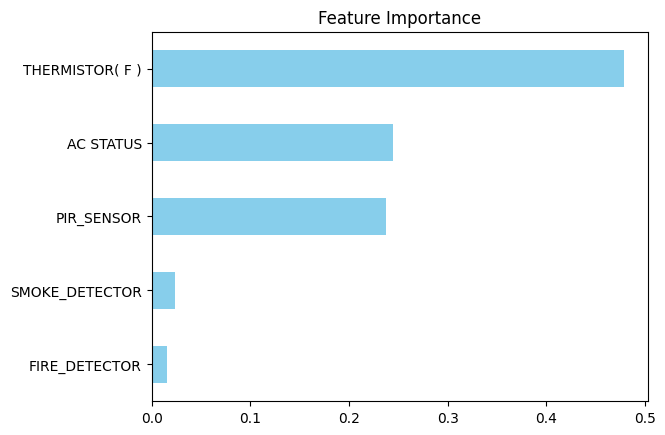

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("Dataset - 9.csv")

# Select relevant sensor data
features = ['PIR_SENSOR', 'THERMISTOR( F )', 'AC STATUS', 'SMOKE_DETECTOR', 'FIRE_DETECTOR']
df['FAILURE_FLAG'] = (df['THERMISTOR( F )'] > 75) & (df['AC STATUS'] == 0)  # PRE-DEFINED POSSIBLE FAILURE CONDITION

# Split data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df['FAILURE_FLAG'], test_size=0.2, random_state=42)

# Scale for better model performance
scaler = StandardScaler()
X_train, X_test = scaler.fit_transform(X_train), scaler.transform(X_test)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions and check performance
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

# Visualize sensor importance
pd.Series(model.feature_importances_, index=features).sort_values().plot(kind="barh", title="Feature Importance", color="skyblue")
plt.show()
